# Dimensionality Reduction

Pre processing is **one of the thoughiest processes in a machine learning** product, not only because of the models, but also inteligently use resources. This is why we are talking about Dimensionality Reduction, **that is preprocessing data to get rid of useless features to boost model training and memory usage**. 

## Procedure
An image is matrix of pixels, **where each pixel has an intensity value. Colored images are commonly represented with three color channels: red, green and blue (RGB)**. We are going to explore the most famous example of dimensionality reduction using Lena's picture, grayscaling the image and applying binarization, and then analysing what effects it should have on a real data pipeline project.


Text(0.5, 1.0, 'Normal (RGB)')

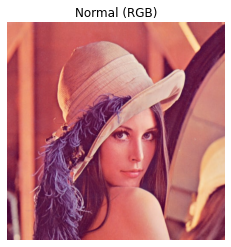

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

# loagind image
img = plt.imread('/content/lenna.jpg')

# displaying image
plt.imshow(img)
plt.axis('off')
plt.title('Normal (RGB)')

# RGB Channels
To visualize all three channels, we should simply multiply every channel but the one we want by 0. It means every other color will turn to black.

Text(0.5, 1.0, 'Blue')

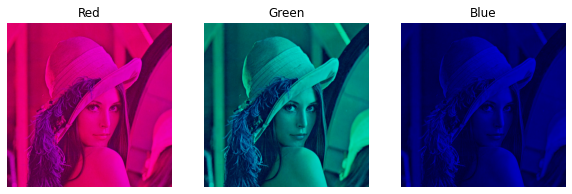

In [5]:
# creating a frame for better visualization
rows = 1
collumns = 3
fig = plt.figure(figsize=(10,10))

# red channel only
red_img = np.copy(img)
red_img[..., 1:2] = 0

fig.add_subplot(rows, collumns, 1)
plt.imshow(red_img)
plt.axis('off')
plt.title('Red')

# blue channel only
green_img = np.copy(img)
green_img[..., 0:1] = 0

fig.add_subplot(rows, collumns, 2)
plt.imshow(green_img)
plt.axis('off')
plt.title('Green')

# green channel only
blue_img = np.copy(img)
blue_img[..., 0:-1] = 0

fig.add_subplot(rows, collumns, 3)
plt.imshow(blue_img)
plt.axis('off')
plt.title('Blue')

# Grayscale
There is a formula that uses matricial algebra to turn RGB to grayscale, given as:
```
gray = 0.2989 * red + 0.5870 * green + 0.1140 * blue
```
Knowing that, we will apply this operation using our function **\`rgb2gray\`**

Text(0.5, 1.0, 'Grayscale')

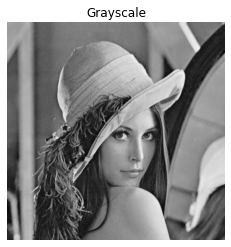

In [22]:
# applying grayscale
def rgb2gray(rgb):
  return np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])

grayscale = rgb2gray(img)
plt.imshow(grayscale, cmap=plt.get_cmap("gray"))
plt.axis('off')
plt.title('Grayscale')


## Binarized images
Despite being a more agressive transformation, it is very welcome on most common computational vision problems. Binarizing an image is the **process of turning pixels into black or white, based on a threshold** defined by the model designer. It is very helpful for situations where you need to process a lot of images with real time precision and in situations where a model only need specific features that rely on borders and other superficial structures.

## Procedure
To binarize an image, we need to **define a threshold and then set every pixel to black or white depending on its distance from the threshold.** This is the most ingenuous implementation, and there are a lot of more advanced implementations that can extract much details more from an image. I recommend [this link](https://www.analyticsvidhya.com/blog/2021/08/image-processing-in-python-the-computer-vision-techniques/#:~:text=Binarization%20is%20of%20the%20image,we%20can%20get%20binary%20images.) if you want to know more.

Text(0.5, 1.0, 'Binarized')

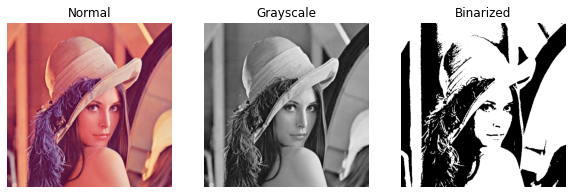

In [23]:
# binarizes images based on a threshold
def binarize(img, threshold):  
  binarized = img.copy()  
  binarized[binarized >= threshold] = 255
  binarized[binarized < threshold] = 0
  return binarized

# frame settings
rows = 1
collumns = 3
fig = plt.figure(figsize=(10, 10))

# displaying normal image
fig.add_subplot(rows, collumns, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Normal')

# displaying grayscaled image
fig.add_subplot(rows, collumns, 2)
plt.imshow(grayscale, cmap=plt.get_cmap("gray"))
plt.axis('off')
plt.title('Grayscale')

# displaying binarized image
binarized = binarize(grayscale, threshold=117)
fig.add_subplot(rows, collumns, 3)
plt.imshow(binarized, cmap=plt.get_cmap("gray"))
plt.axis('off')
plt.title('Binarized')

## Conclusion
Working with bigger datasets require a lot of **preprocessing skills to effectively produce good models spending the less resources as possible**. Even the most powerful computers out there can strugle if the datasets are not well preprocessed. 
**The right strategy depends on each machine learning project**, as some models require more features or complex relations that require attention, but will certainly produce great results.